Fancy-pants plots for the paper.

In [24]:
data_file = './human_and_llm_annotated_data.csv'

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [59]:
df_in = pd.read_csv(data_file)
df_in.head()

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median,Ground Truth nBars,LLM nGaussians,LLM Median,LLM nGaussians (int)
0,annotator1,id_0041.jpeg,1,0.055,0.055269,1,0.054428,50,1,0.055,1
1,annotator1,id_0014.jpeg,3,0.450,0.457472,1,0.478811,50,3,0.485,3
2,annotator1,id_0028.jpeg,2,-0.420,-0.415863,2,-0.417302,45,1,-0.420,1
3,annotator1,id_0057.jpeg,2,-0.700,-0.707283,2,-0.758364,50,2,-0.600,2
4,annotator1,id_0020.jpeg,1,-0.200,-0.171428,1,-0.178007,50,1,-0.050,1


In [60]:
# do some cleaning for any "weird" LLM annotations
df_in[ (df_in['LLM Median'] < -1.0) | (df_in['LLM Median'] > 1.0) ] # outside range of plotted data

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median,Ground Truth nBars,LLM nGaussians,LLM Median,LLM nGaussians (int)
23,annotator1,id_0068.jpeg,2,0.0,-0.035531,1,-0.021979,50,3,70.0,3
123,annotator2,id_0068.jpeg,3,0.0,-0.004829,1,-0.021979,50,3,70.0,3


In [66]:
df = df_in.copy()
# set to NaN's
df.loc[(df_in['LLM Median'] < -1.0) | (df_in['LLM Median'] > 1.0),'LLM Median'] = np.nan

In [67]:
df.head()

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median,Ground Truth nBars,LLM nGaussians,LLM Median,LLM nGaussians (int)
0,annotator1,id_0041.jpeg,1,0.055,0.055269,1,0.054428,50,1,0.055,1
1,annotator1,id_0014.jpeg,3,0.450,0.457472,1,0.478811,50,3,0.485,3
2,annotator1,id_0028.jpeg,2,-0.420,-0.415863,2,-0.417302,45,1,-0.420,1
3,annotator1,id_0057.jpeg,2,-0.700,-0.707283,2,-0.758364,50,2,-0.600,2
4,annotator1,id_0020.jpeg,1,-0.200,-0.171428,1,-0.178007,50,1,-0.050,1


Specific for each annotator:

In [68]:
df_a1 = df[df['annotators']=='annotator1']
df_a2 = df[df['annotators']=='annotator2']
# since we have repeats for LLMs, just pick one so we don't repeat
df_allm = df[df['annotators']=='annotator1']

## Plot with residuals -- Medians

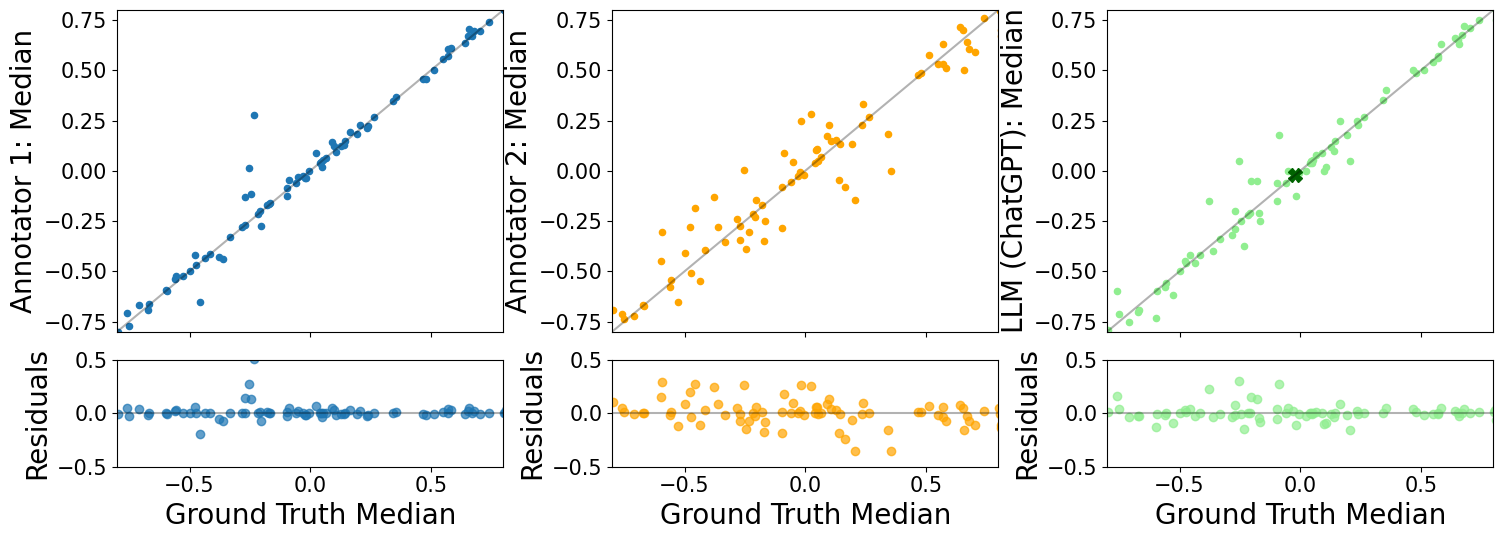

In [69]:
llm_color = 'lightgreen'
a1_color = 'tab:blue'
a2_color = 'orange'

llm_error_color = 'darkgreen'
llm_error_marker_size = 10

equal_line_color = 'black'
equal_line_style = '-'
equal_line_alpha = 0.3

font_size_labels = 20
font_size_ticks = 15

# y-axis labels
yaxis_labels = ['Annotator 1: Median', 'Annotator 2: Median', 'LLM (ChatGPT): Median']

base = 5
# Create 2x3 subplots with shared x-axes
fig, ax = plt.subplots(2, 3, figsize=(base*3, base*1.1), 
                       gridspec_kw={'height_ratios': [3, 1]}, 
                       sharex='col')

############### ANNOTATOR 1 ###################

df_a1.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', ax=ax[0,0], color=a1_color)

# Calculate and plot residuals for Annotator 1
residuals_a1 = df_a1['Human median (draw)'] - df_a1['Ground Truth Median']
residuals_a1 = residuals_a1.values
ax[1,0].scatter(df_a1['Ground Truth Median'], residuals_a1, color=a1_color, alpha=0.7)
ax[1,0].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,0].set_ylabel('Residuals', fontsize=font_size_labels)

############### ANNOTATOR 2 ###################

df_a2.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', ax=ax[0,1], color=a2_color)

# Calculate and plot residuals for Annotator 2
residuals_a2 = df_a2['Human median (draw)'] - df_a2['Ground Truth Median']
residuals_a2 = residuals_a2.values
ax[1,1].scatter(df_a2['Ground Truth Median'], residuals_a2, color=a2_color, alpha=0.7)
ax[1,1].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,1].set_ylabel('Residuals', fontsize=font_size_labels)

##################### LLM #####################

df_allm.plot(x='Ground Truth Median', y='LLM Median', kind='scatter', color=llm_color, ax=ax[0,2])

# Calculate and plot residuals for LLM (excluding NaN values)
llm_residuals = []
llm_gt_values = []
for i in range(len(df_allm)):
    llmm = df_allm.iloc[i]['LLM Median']
    gtm = df_allm.iloc[i]['Ground Truth Median']
    try:
        llmm = float(llmm)
        if not np.isnan(llmm):
            llm_residuals.append(llmm - gtm)
            llm_gt_values.append(gtm)
    except:
        pass

# update
llm_residuals = np.array(llm_residuals)
ax[1,2].scatter(llm_gt_values, llm_residuals, color=llm_color, alpha=0.7)
ax[1,2].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,2].set_ylabel('Residuals', fontsize=font_size_labels)

# plot NaNs (only on main plot)
for i in range(len(df_allm)):
    llmm = df_allm.iloc[i]['LLM Median']
    try:
        llmm = float(llmm)
    except:
        print("FAILED:", llmm)
        llmm = np.nan
    try:
        if np.isnan(llmm):
            gtm = df_allm.iloc[i]['Ground Truth Median']
            ax[0,2].plot([gtm],[gtm], color=llm_error_color, marker='X', ms=llm_error_marker_size)
    except:
        pass

# Set limits and equal lines for main plots only
mxmin = -0.8
mxmax = 0.8
for i in range(3):  # Only for the top row (main plots)
    ax[0,i].set_ylim(mxmin, mxmax)
    ax[0,i].set_xlim(mxmin, mxmax)
    ax[0,i].plot([mxmin,mxmax], [mxmin,mxmax], color=equal_line_color, 
                 linestyle=equal_line_style, zorder=10, 
                 alpha=equal_line_alpha)
    ax[0,i].set_ylabel(yaxis_labels[i], fontsize=font_size_labels)

# Set limits and equal lines for resids plots only
mxminr = -0.5
mxmaxr = 0.5
for i in range(3):  # Only for the top row (main plots)
    ax[1,i].set_ylim(mxminr, mxmaxr)
    #ax[0,i].set_xlim(mxminr, mxmaxr)
    # ax[0,i].plot([mxmin,mxmax], [mxmin,mxmax], color=equal_line_color, 
    #              linestyle=equal_line_style, zorder=10, 
    #              alpha=equal_line_alpha)
    # ax[0,i].set_ylabel(yaxis_labels[i], fontsize=font_size_labels)

# Set font sizes for all axes
for i in range(2):  # Both rows
    for j in range(3):  # All columns
        # Set tick label font sizes
        ax[i,j].tick_params(axis='both', which='major', labelsize=font_size_ticks)
        
        # Set x-axis label font size (only for bottom row)
        if i == 1:
            ax[i,j].set_xlabel('Ground Truth Median', fontsize=font_size_labels)

# Adjust layout to prevent overlapping
plt.tight_layout()

fig.savefig('/Users/jnaiman/Dropbox/Paper_JCDL2025/figures/relation_and_residuals.pdf')

## Calculation -- normalicy of residuals

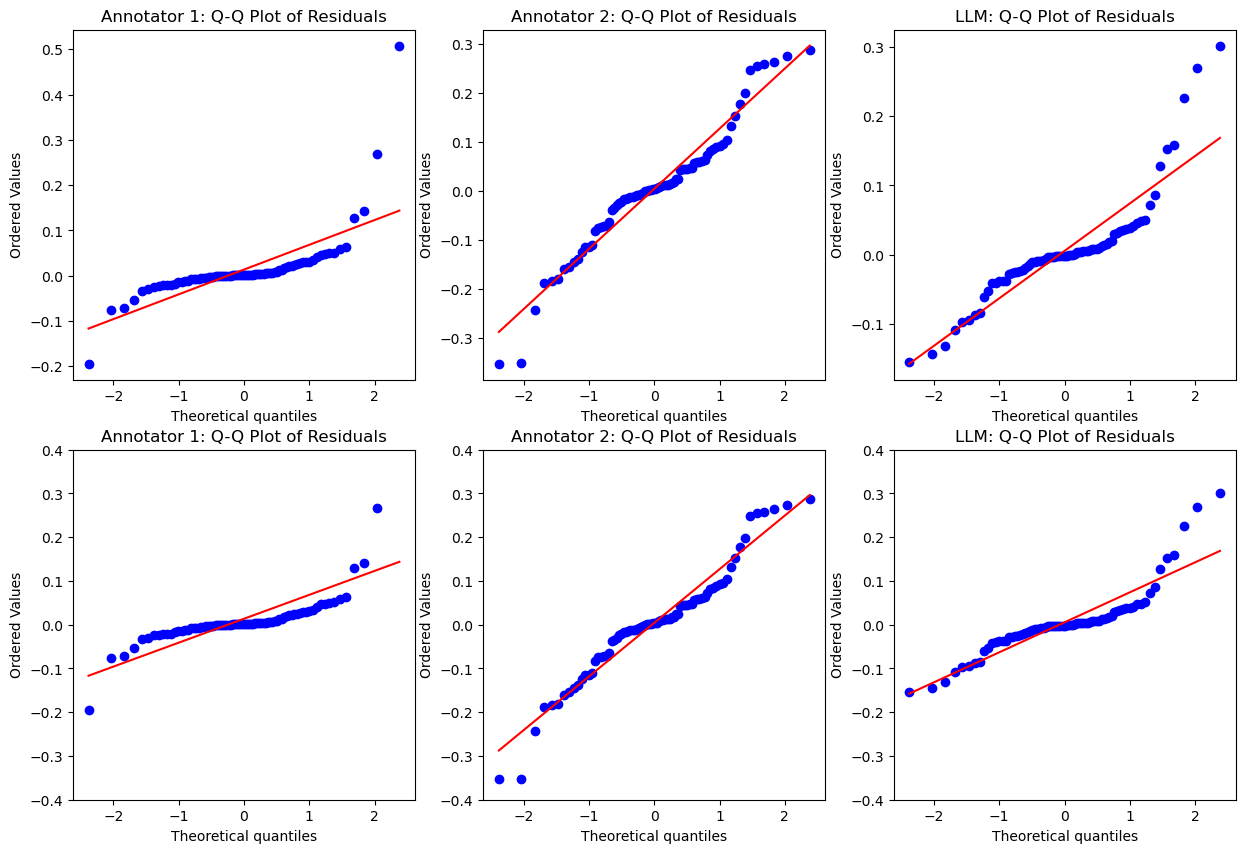

In [70]:
# Assuming 'residuals' is a list or array of your model's residuals
fig, axes = plt.subplots(2,3, figsize=(5*3,5*2))

for ax,res,name in zip(axes[0,:], [residuals_a1, residuals_a2, llm_residuals], ['Annotator 1', 'Annotator 2', 'LLM']):
    stats.probplot(res, dist="norm", plot=ax)
    ax.set_title(name + ": Q-Q Plot of Residuals") 

# also with some limits
ymin,ymax = -0.4, 0.4
for ax,res,name in zip(axes[1,:], [residuals_a1, residuals_a2, llm_residuals], ['Annotator 1', 'Annotator 2', 'LLM']):
    stats.probplot(res, dist="norm", plot=ax)
    ax.set_title(name + ": Q-Q Plot of Residuals")
    ax.set_ylim(ymin,ymax)
plt.show()

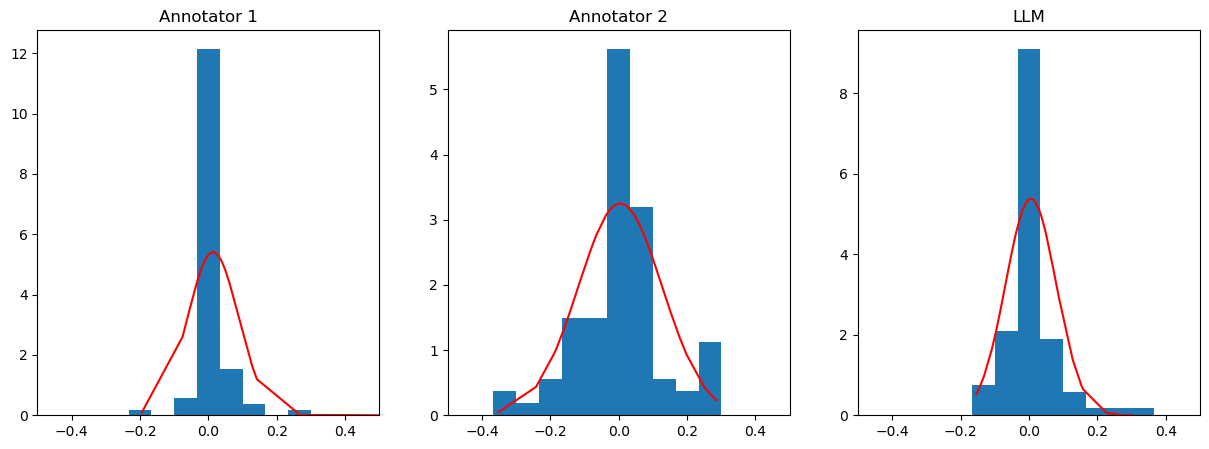

In [71]:
# plot actual distributions
fig, axes = plt.subplots(1,3, figsize=(5*3,5))
nbins = 15
mxmin = -0.5
mxmax = 0.5

bins = np.linspace(mxmin,mxmax,nbins+1)

for ax,res,name in zip(axes, [residuals_a1, residuals_a2, llm_residuals], ['Annotator 1', 'Annotator 2', 'LLM']):
    ax.hist(res,bins=bins, density=True)
    ax.set_title(name)
    # overplot normal
    hmean = np.mean(res)
    hstd = np.std(res)
    pdf = stats.norm.pdf(res, hmean, hstd)
    rsort = np.argsort(res)
    ax.plot(res[rsort], pdf[rsort], 'r-')

    ax.set_xlim(mxmin,mxmax)

plt.show()

A few reminders to jog the memory about residuals: 
* https://www.youtube.com/watch?v=41l3AAV35zk
* https://www.datacamp.com/tutorial/qq-plot

Some "heavy tails" -- i.e. a bit more in the tails than in the middle, but also more peaked in the middle.  So an ANOVA test might be OK but maybe we also want to do something like a non-parametric, Kruskal-Wallis H-test, type test?

Let's do some actual tests for normalicy of residuals:


In [72]:
from scipy.stats import shapiro

for res,name in zip([residuals_a1, residuals_a2, llm_residuals], ['Annotator 1', 'Annotator 2', 'LLM']):
    # Assuming 'residuals' is a list or array of your model's residuals
    print('------ ' + name + ' --------')
    stat, p_value = shapiro(res)
    print(f"Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p_value:.3f}")

    if p_value > 0.05:  # Using a common significance level of 0.05
        print("Residuals are likely normally distributed (fail to reject H0)")
    else:
        print("Residuals are not normally distributed (reject H0)")

------ Annotator 1 --------
Shapiro-Wilk Test: Statistic=0.551, p-value=0.000
Residuals are not normally distributed (reject H0)
------ Annotator 2 --------
Shapiro-Wilk Test: Statistic=0.951, p-value=0.004
Residuals are not normally distributed (reject H0)
------ LLM --------
Shapiro-Wilk Test: Statistic=0.827, p-value=0.000
Residuals are not normally distributed (reject H0)


In [73]:
from scipy.stats import normaltest

for res,name in zip([residuals_a1, residuals_a2, llm_residuals], ['Annotator 1', 'Annotator 2', 'LLM']):
    print('------ ' + name + ' --------')
    # Assuming 'residuals' is a list or array of your model's residuals
    stat, p_value = normaltest(res)
    print(f"D'Agostino-Pearson Test: Statistic={stat:.3f}, p-value={p_value:.3f}")

    if p_value > 0.05:
        print("Residuals are likely normally distributed (fail to reject H0)")
    else:
        print("Residuals are not normally distributed (reject H0)")

------ Annotator 1 --------
D'Agostino-Pearson Test: Statistic=104.598, p-value=0.000
Residuals are not normally distributed (reject H0)
------ Annotator 2 --------
D'Agostino-Pearson Test: Statistic=3.877, p-value=0.144
Residuals are likely normally distributed (fail to reject H0)
------ LLM --------
D'Agostino-Pearson Test: Statistic=36.891, p-value=0.000
Residuals are not normally distributed (reject H0)


So, overall, probably definitely not normal, but based on the plots above, they are certainly normal-ish.  To be safe, let's do a non parametric test for a difference of medians (note -- not means here, medians).

In [74]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = kruskal(residuals_a1, residuals_a2, llm_residuals)

print(f"Kruskal-Wallis H-statistic: {h_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between group medians.")
else:
    print("Fail to reject the null hypothesis: No significant difference found between group medians.")

Kruskal-Wallis H-statistic: 1.24
P-value: 0.537
Fail to reject the null hypothesis: No significant difference found between group medians.


Let's also test the difference in varience -- i.e. do the variences differ from one another.  Let's use Levene's test since we have slightly non-normal distributions.

In [75]:
levene_stat = 'median'

stat, p_lev = stats.levene(residuals_a1, residuals_a2, llm_residuals, center=levene_stat)
if p_lev < 0.05:
    print("Reject the null hypothesis: There is a significant difference between group variances.")
else:
    print("Fail to reject the null hypothesis: No significant difference found between group variances.")

Reject the null hypothesis: There is a significant difference between group variances.


Let's figure out which comparisons lead to the difference:

In [76]:
resids_compare = {'A1':residuals_a1, 'A2':residuals_a2, 'LLM':llm_residuals}

pvalues_compare = {}
for l1,r1 in resids_compare.items():
    for l2,r2 in resids_compare.items():
        if l1 != l2:
            stat, p_lev = stats.levene(r1,r2, center=levene_stat)
            # make sure its not repeated
            if (l1+'-'+l2 not in pvalues_compare) and (l2+'-'+l1 not in pvalues_compare):
                pvalues_compare[l1+'-'+l2] = p_lev

In [77]:
pvalues_compare

{'A1-A2': 2.324255859313614e-05,
 'A1-LLM': 0.22225986838504352,
 'A2-LLM': 0.0006506588611719899}

In [78]:
from statsmodels.stats.multitest import multipletests

# Example p-values from multiple pairwise Levene's tests
p_values = list(pvalues_compare.values()) #[0.01, 0.005, 0.03] # Example p-values from pairwise comparisons

# Apply Bonferroni-Holm correction
reject, pvals_corrected, alphac_sidak, alphac_bonf = multipletests(p_values, alpha=0.05, method='holm')

print('comparisons:', list(pvalues_compare.keys()))
print(f"Original P-values: {p_values}")
print(f"Holm-adjusted P-values: {pvals_corrected}")
print(f"Rejection decisions (Holm): {reject}")

comparisons: ['A1-A2', 'A1-LLM', 'A2-LLM']
Original P-values: [2.324255859313614e-05, 0.22225986838504352, 0.0006506588611719899]
Holm-adjusted P-values: [6.97276758e-05 2.22259868e-01 1.30131772e-03]
Rejection decisions (Holm): [ True False  True]


So, it looks like the LLM and annotator 1 have around the same spread, while annotator 2 is the spread that is different from both of those.